In [10]:
import pandas as pd
import re
from pathlib import Path

data_dir = Path('data')
episode_files = sorted(data_dir.glob('reddit_episode_*.csv'))

In [11]:
episode_stats = []

for file_path in episode_files:
    # Extract episode number from filename (e.g., reddit_episode_1.csv -> 1)
    match = re.search(r'reddit_episode_(\d+)\.csv', file_path.name)
    if match:
        episode_number = int(match.group(1))
        df = pd.read_csv(file_path)
        
        num_posts = len(df)
        num_comments = df['num_comments'].sum() if 'num_comments' in df.columns else 0
        score = df['score'].sum() if 'score' in df.columns else 0
        avg_comments_per_post = round(num_comments / num_posts, 2) if num_posts != 0 else 0 # div error
        
        episode_stats.append({
            'episode_number': episode_number,
            'num_posts': num_posts,
            'num_comments': num_comments,
            'score': score,
            'avg_comments_per_post': avg_comments_per_post
        })

episode_analytics = pd.DataFrame(episode_stats)
episode_analytics = episode_analytics.sort_values('episode_number').reset_index(drop=True)

episode_analytics

,episode_number,num_posts,num_comments,score,avg_comments_per_post
0,1,1,282,39,282.00
1,2,1,260,15,260.00
2,3,3,320,248,106.67
3,4,9,511,348,56.78
4,5,2,296,59,148.00
5,6,3,453,50,151.00
6,7,5,583,677,116.60
7,8,3,423,119,141.00
8,9,1,366,21,366.00
9,10,1,418,17,418.00


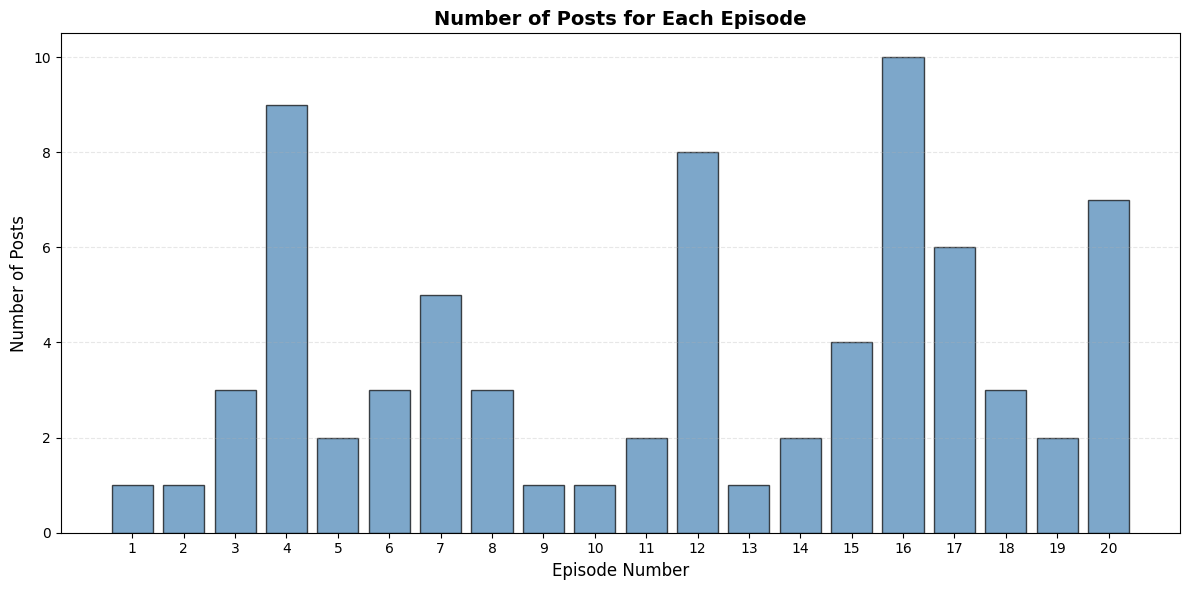

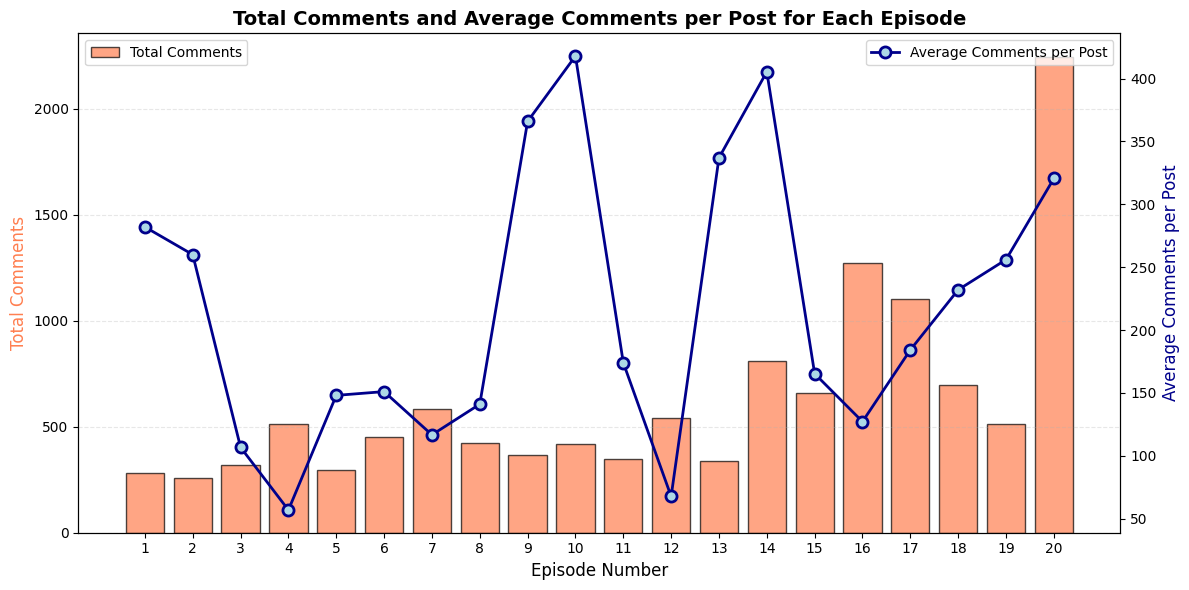

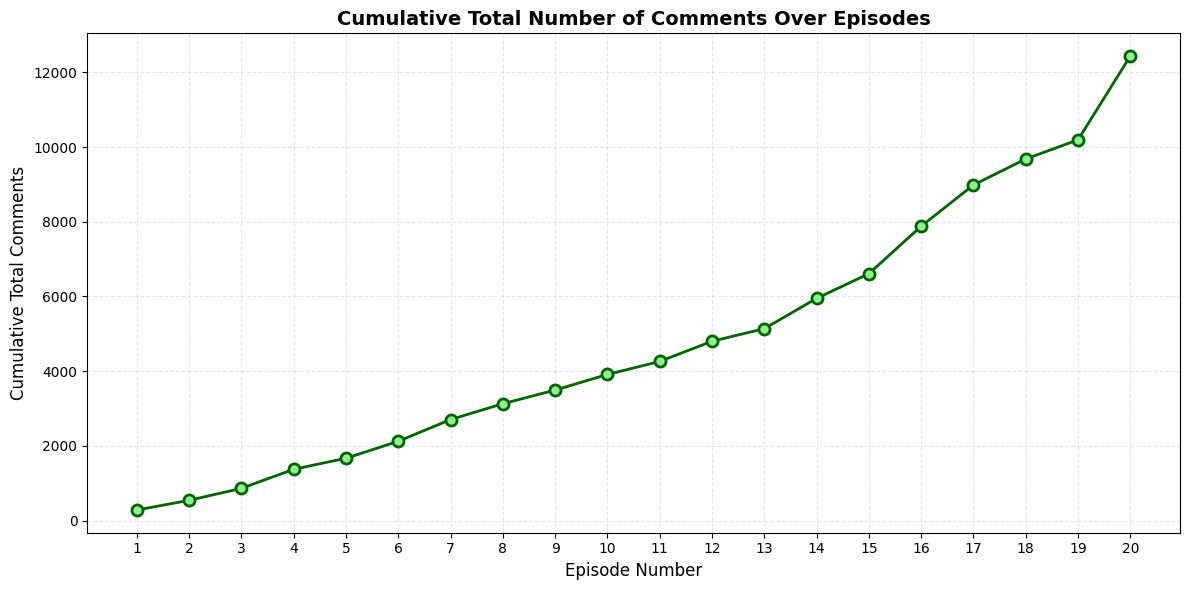

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
fig_size = (12, 6)

# 1. Bar plot: Number of posts per episode with line plot of average comments per post
fig, ax1 = plt.subplots(figsize=fig_size)

bars1 = ax1.bar(episode_analytics['episode_number'], episode_analytics['num_posts'], 
                label='Number of Posts', color='steelblue', edgecolor='black', alpha=0.7)

ax2 = ax1.twinx()
# Plot average comments as a line
line2 = ax2.plot(episode_analytics['episode_number'], episode_analytics['avg_comments_per_post'],
                 marker='o', linewidth=2, markersize=8, label='Average Comments per Post', 
                 color='darkorange', markerfacecolor='orange', markeredgecolor='darkorange',
                 markeredgewidth=2)

# Add horizontal line for overall average
overall_avg_comments = episode_analytics['avg_comments_per_post'].mean()
ax2.axhline(y=overall_avg_comments, color='red', linestyle='--', linewidth=2, 
            label=f'Overall Average ({overall_avg_comments:.1f})', alpha=0.7)

# Customize axes
ax1.set_xlabel('Episode Number', fontsize=12)
ax1.set_ylabel('Number of Posts', fontsize=12, color='steelblue')
ax2.set_ylabel('Average Comments per Post', fontsize=12, color='darkorange')
ax1.set_title('Number of Posts and Average Comments per Post for Each Episode', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(episode_analytics['episode_number'])
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 2. Time series plot: Cumulative total number of comments
episode_analytics['cumulative_comments'] = episode_analytics['num_comments'].cumsum()

plt.figure(figsize=fig_size)
plt.plot(episode_analytics['episode_number'], episode_analytics['cumulative_comments'],
         marker='o', linewidth=2, markersize=8, color='darkgreen', markerfacecolor='lightgreen',
         markeredgecolor='darkgreen', markeredgewidth=2)
plt.xlabel('Episode Number', fontsize=12)
plt.ylabel('Cumulative Total Comments', fontsize=12)
plt.title('Cumulative Total Number of Comments Over Episodes', fontsize=14, fontweight='bold')
plt.xticks(episode_analytics['episode_number'])
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

